<a href="https://colab.research.google.com/github/ManisMalakar/Convolutional-Neural-Network-/blob/main/Digit_Recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
#Data PreProcessing
#Importing the data set
from tensorflow.keras.datasets import mnist

In [81]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

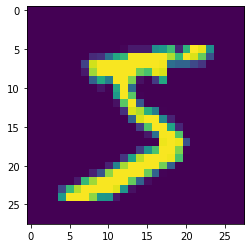

In [82]:
plt.imshow(x_train[0])

In [83]:
y_train[0]

5

In [84]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [85]:
y_test.shape,x_test.shape

((10000,), (10000, 28, 28))

In [86]:
x_train.min(), x_train.max()

(0, 255)

In [87]:
y_train.min(), y_train.max()

(0, 9)

In [88]:
#Normalizing the images
x_train=x_train/255.0
x_test=x_test/255.0

In [89]:
#Reshaping the images
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [90]:
input_shape=x_train[0].shape

In [91]:
print(input_shape)

(28, 28, 1)


In [92]:
#Building the model

#Defining the object
model=tf.keras.models.Sequential()

# Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# addding flatten layer
model.add(tf.keras.layers.Flatten())

# fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [94]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy'])

In [95]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 143s 304ms/step - loss: 0.3607 - sparse_categorical_crossentropy: 0.3607 - val_loss: 0.0510 - val_sparse_categorical_crossentropy: 0.0510
Epoch 2/10
469/469 [==============================] - 143s 305ms/step - loss: 0.0522 - sparse_categorical_crossentropy: 0.0522 - val_loss: 0.0384 - val_sparse_categorical_crossentropy: 0.0384
Epoch 3/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0335 - sparse_categorical_crossentropy: 0.0335 - val_loss: 0.0304 - val_sparse_categorical_crossentropy: 0.0304
Epoch 4/10
469/469 [==============================] - 143s 304ms/step - loss: 0.0255 - sparse_categorical_crossentropy: 0.0255 - val_loss: 0.0274 - val_sparse_categorical_crossentropy: 0.0274
Epoch 5/10
469/469 [==============================] - 142s 303ms/step - loss: 0.0189 - sparse_categorical_crossentropy: 0.0189 - val_loss: 0.0317 - val_sparse_categorical_crossentropy: 0.0317
Epoch 6/10
469/469 [====================

In [96]:
#Model Prediction
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [97]:
y_pred[15],y_test[15]

(5, 5)

In [98]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 974    1    0    0    0    0    3    1    1    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   1    1 1026    0    2    0    0    2    0    0]
 [   0    0    2 1004    0    3    0    0    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   0    0    0    5    0  885    1    0    1    0]
 [   2    1    0    0    2    1  949    0    3    0]
 [   0    1    7    0    1    0    0 1012    1    6]
 [   2    0    2    1    0    0    2    1  964    2]
 [   0    0    1    0    6    2    0    2    1  997]]


In [99]:
acc_cm=accuracy_score(y_test,y_pred)

In [100]:
print(acc_cm)

0.9916


In [101]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()